In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[7,7]},font_scale=1.1)

In [2]:
#Read dataset
df=pd.read_csv("Titanic.csv")

In [3]:
#Data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Nans in dataset
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

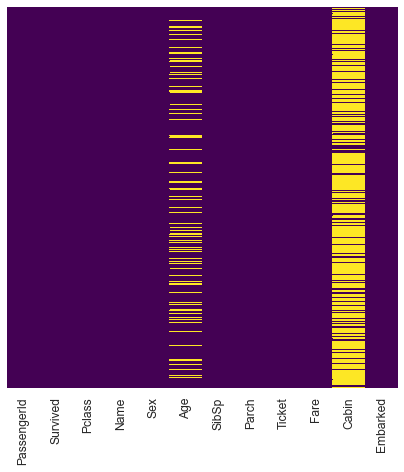

In [6]:
#Nans by heatmap
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis');

In [7]:
#Put the mean instead of nans in Age column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
#No nans
df['Age'].isna().sum()

0

In [9]:
#Counts for each value into Cabin column
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
A19            1
A7             1
C91            1
A5             1
B37            1
Name: Cabin, Length: 147, dtype: int64

In [10]:
#Replace nans in Cabin column
df['Cabin']=df['Cabin'].fillna('A19')

In [11]:
#No nans
df['Cabin'].isna().sum()

0

In [12]:
#Embarked value counts
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#Replace nans in Embarked columns
df['Embarked']=df['Embarked'].fillna('Q')

In [14]:
#No nans
df['Embarked'].isna().sum()

0

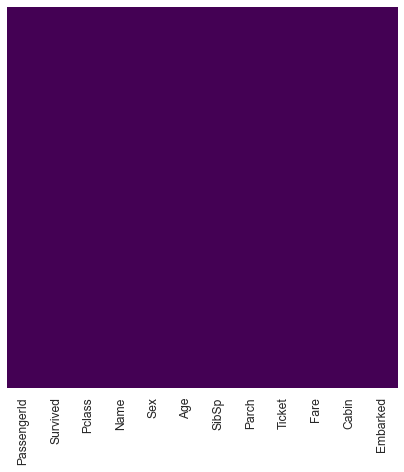

In [15]:
#The data is clean
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis");

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A19,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A19,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A19,S


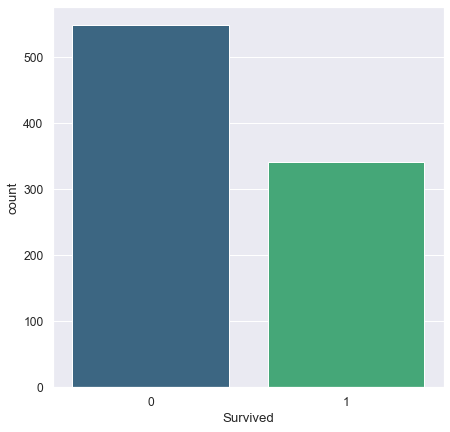

In [17]:
#The number of survived is low
sns.countplot(x='Survived',data=df,palette="viridis");

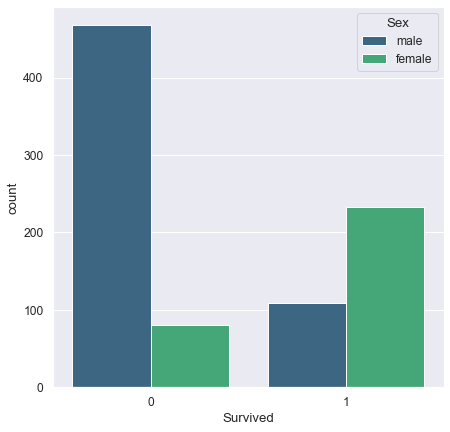

In [18]:
#Number of survived males are lower than females and there are a lot of unsurvived males compare to females 
sns.countplot(x='Survived',hue='Sex',palette='viridis',data=df);

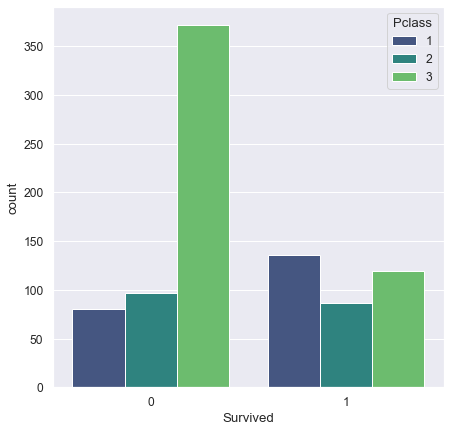

In [19]:
#Survivors in pclass 1 higher than others
#In pclass 3 we have a lot of unsurvivors compare to others
sns.countplot(x='Survived',data=df,hue='Pclass',palette='viridis');

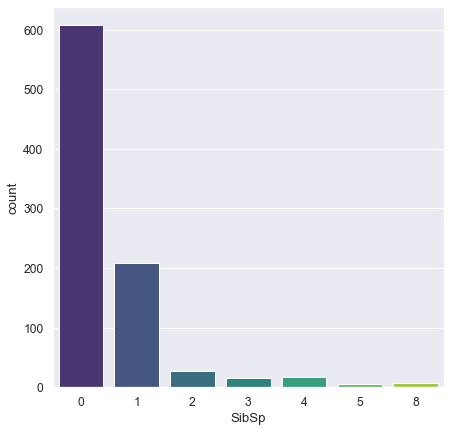

In [20]:
#Alot of people haven't sibsp
sns.countplot(x='SibSp',data=df,palette='viridis');

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

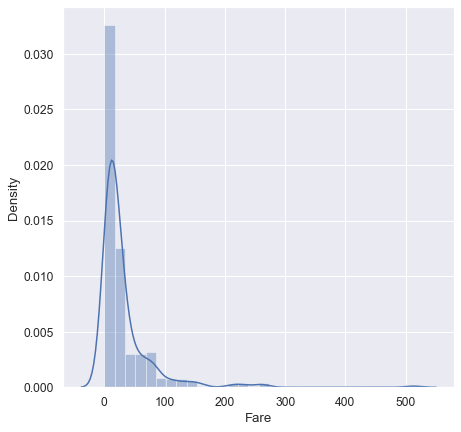

In [21]:
#Too much pay low fare
sns.distplot(df['Fare'],bins=30)

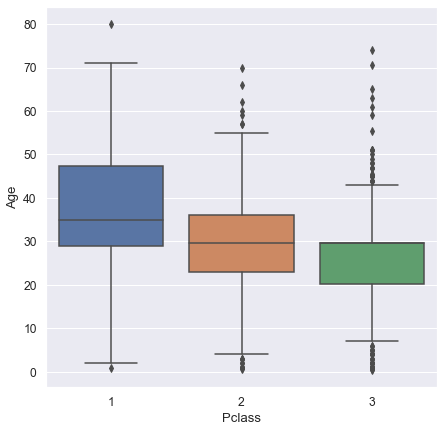

In [30]:
#The oldest people are in pclass 1, and it has different ages
sns.boxplot(x='Pclass',y='Age',data=df);

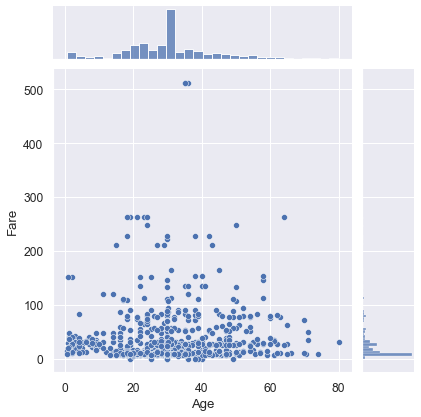

In [33]:
#No relationship between age and fare
sns.jointplot(x='Age',y='Fare',data=df,palette='viridis');

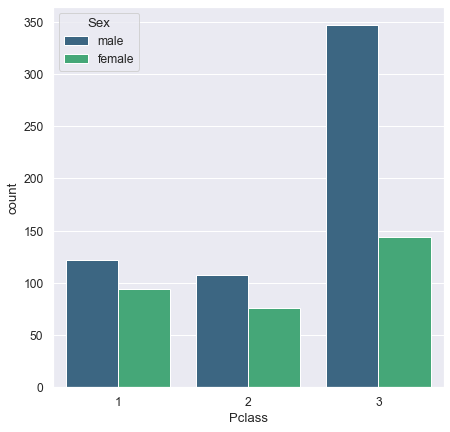

In [34]:
#Too much males in pclass 1, pclass 2 and pclass 3
sns.countplot(x='Pclass',hue='Sex',data=df,palette='viridis');

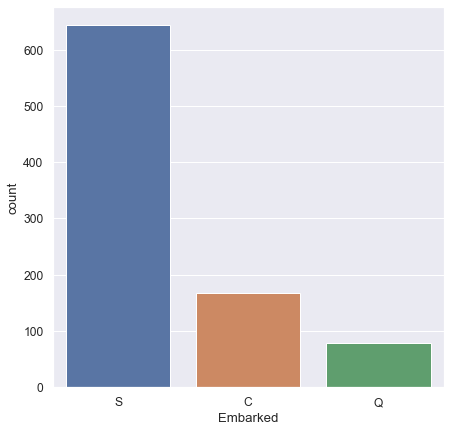

In [36]:
#A lot of passengers came from Southampton (S)
sns.countplot(x='Embarked',data=df);

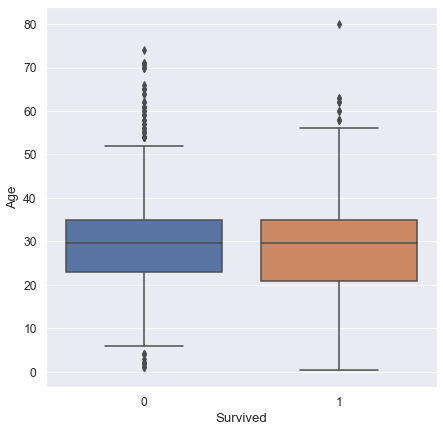

In [37]:
#Survived people have a much variety of ages
sns.boxplot(x='Survived',y='Age',data=df);

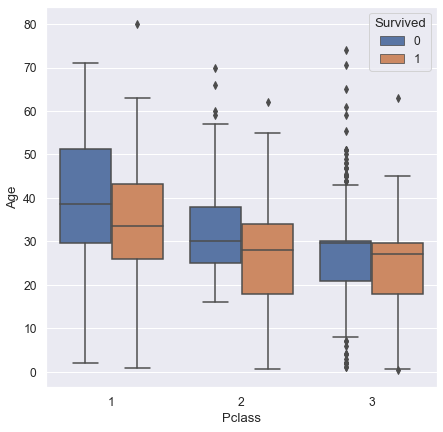

In [38]:
#In pclass 1, Unsurvived people have a much variety of ages
#In pclass 2, Survived people have a much variety of ages
#In pclass 3, Survived people have a much variety of ages
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=df);

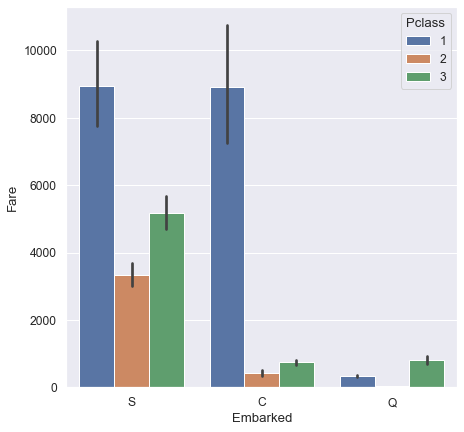

In [43]:
#In Southampton (S) sum is very high in pclass 1
#In Cherbourg   (C) sum is very high in pclass 1
#In Queenstown  (Q) sum is very high in pclass 3
sns.barplot(y='Fare',x='Embarked',hue='Pclass',data=df,estimator=np.sum);

In [51]:
#Data correlation
data_corr=df.corr()
data_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


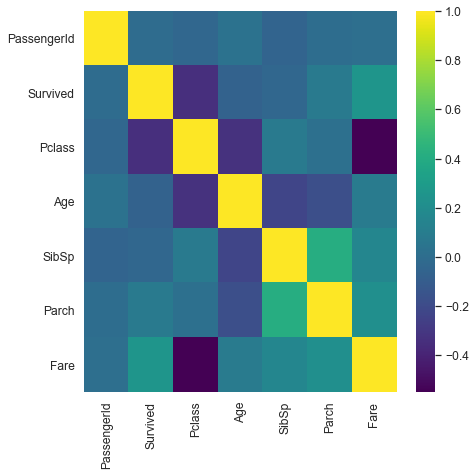

In [63]:
#Data correlation by using heatmap
sns.heatmap(data_corr,cmap='viridis');